In [1]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('../../IMDB Dataset.csv')
df.sample(5)

,review,sentiment
44787,"Awful, simply awful. It proves my theory about...",negative
17636,This is one of my favourite books and I rememb...,positive
46847,The only reason I knew of Midnight Cowboy was ...,positive
15118,"This movie was released originally as a soft ""...",positive
19221,"Radio was a very good movie, and honestly, i n...",positive


In [2]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()

# Clean the reviews
df['review'] = df['review'].apply(clean_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=200)

In [3]:
# Convert sentiment labels to binary
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['sentiment'].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.6884 - loss: 0.5535 - val_accuracy: 0.8710 - val_loss: 0.3128
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.8935 - loss: 0.2738 - val_accuracy: 0.8729 - val_loss: 0.3083
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.9151 - loss: 0.2233 - val_accuracy: 0.8644 - val_loss: 0.3329
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9322 - loss: 0.1850 - val_accuracy: 0.8535 - val_loss: 0.3589
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9470 - loss: 0.1507 - val_accuracy: 0.8595 - val_loss: 0.3673
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9572 - loss: 0.1221 - val_accuracy: 0.8609 - val_loss: 0.4865
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9681 - loss: 0.0959 - val_accuracy: 0.8514 - val_loss: 0.4069
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9731 - loss: 0.08

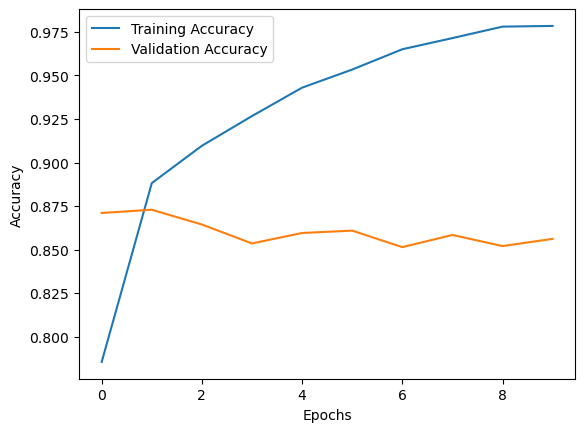

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8567 - loss: 0.5564
Test Accuracy: 0.86


In [10]:
sample_reviews = [
    "I absolutely loved this movie! The plot was thrilling and the characters were so well developed.",
    "The film was a disaster. Poor acting and a predictable storyline."
]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200)

predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
['Positive', 'Negative']
[[0.98841304]
 [0.00102003]]
